In [15]:
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
image_set =  "lung_image_sets"

In [3]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 12005 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-08-10 23:22:42.715688: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [8]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# COMPILING THE MODEL

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
#executing the model
history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 5, verbose = 1)

/home/u200501/tmp/ipykernel_2427406/1353619056.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, validation_data = (validate_set), epochs = 5, verbose = 1)


Epoch 1/5


2023-08-10 23:23:00.127376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


94/94 [==============================] - ETA: 0s - loss: 7.7512 - accuracy: 0.7828

2023-08-10 23:28:19.914678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


94/94 [==============================] - 402s 4s/step - loss: 7.7512 - accuracy: 0.7828 - val_loss: 0.1666 - val_accuracy: 0.9577
Epoch 2/5
94/94 [==============================] - 395s 4s/step - loss: 0.1885 - accuracy: 0.9524 - val_loss: 0.1628 - val_accuracy: 0.9557
Epoch 3/5
94/94 [==============================] - 393s 4s/step - loss: 0.3705 - accuracy: 0.9344 - val_loss: 0.1968 - val_accuracy: 0.9660
Epoch 4/5
94/94 [==============================] - 395s 4s/step - loss: 0.0648 - accuracy: 0.9807 - val_loss: 0.0688 - val_accuracy: 0.9777
Epoch 5/5
94/94 [==============================] - 398s 4s/step - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0559 - val_accuracy: 0.9830


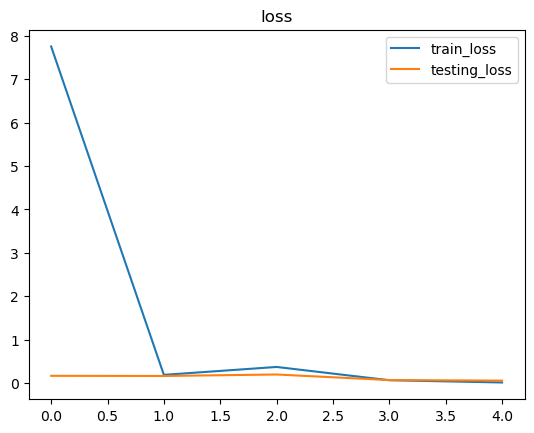

In [12]:
# plotting the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

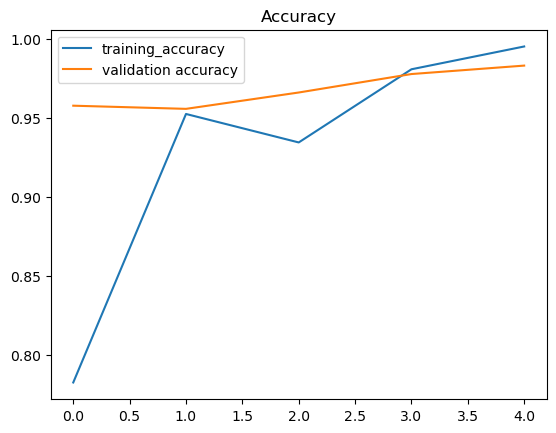

In [13]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [14]:
# CHECKING THE CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Y_pred = model.predict_generator(validate_set)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(validate_set.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

/home/u200501/tmp/ipykernel_2427406/3679118821.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validate_set)
2023-08-10 23:57:57.206482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Confusion Matrix
[[962   1  37]
 [  3 997   0]
 [ 10   0 990]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.96      0.97      1000
           n       1.00      1.00      1.00      1000
         scc       0.96      0.99      0.98      1000

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



<AxesSubplot:>

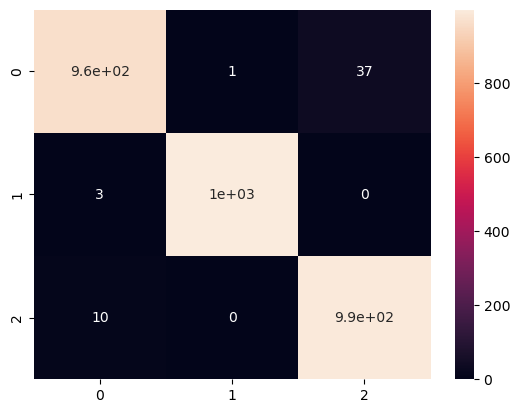

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

In [17]:
import pickle as pkl

In [30]:
# save model
model.save('Weights/ModelWeights.h5')
print('Model Saved!')

Model Saved!


####
RUN FROM BELOW
####
####
####
####

In [59]:
from keras.models import load_model

savedModel = load_model('Weights/ModelWeights.h5')
print('Model Loaded!')

Model Loaded!


In [60]:
image_path = 'lung_image_sets/lung_aca/lungaca7.jpeg'

In [61]:
from tensorflow.keras.utils import img_to_array
original = load_img(image_path, target_size = (224, 224))

In [62]:
from tensorflow.keras.utils import img_to_array
numpy_image = img_to_array(original) 

In [63]:
print('numpy array size',numpy_image.shape) 

numpy array size (224, 224, 3)


In [64]:
image_batch = np.expand_dims(numpy_image, axis = 0)

In [65]:
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [66]:
from tensorflow.keras.applications import resnet as rt
processed_image = rt.preprocess_input(image_batch.copy())

In [67]:
predictionx = savedModel.predict(processed_image)
clas = np.argmax(predictionx ,axis =1)

1/1 [==============================] - 1s 797ms/step


In [68]:
print(predictionx)

[[9.1560638e-01 8.4393591e-02 3.1111638e-11]]


In [69]:
if clas==[0]:
    print("ACA")
elif clas==[1]:
    print("N")
else:
    print("SCC")

ACA
